In [1]:
import pandas as pd

# Load the dataset
file_path = 'amd.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.0,3.302083,3.125000,3.145833,3.145833,219600
1,1980-03-18,0.0,3.125000,2.937500,3.031250,3.031250,727200
2,1980-03-19,0.0,3.083333,3.020833,3.041667,3.041667,295200
3,1980-03-20,0.0,3.062500,3.010417,3.010417,3.010417,159600
4,1980-03-21,0.0,3.020833,2.906250,2.916667,2.916667,130800


In [2]:
# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values
missing_values = data.isnull().sum()

# Display missing values
missing_values

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [3]:
# Fill missing values using forward fill
data.fillna(method='ffill', inplace=True)

# Verify that there are no missing values
missing_values_after_ffill = data.isnull().sum()

missing_values_after_ffill

/var/folders/1k/rsc6z_156_36hpxhr9fbzsch0000gn/T/ipykernel_18921/1193937834.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [4]:
# Display basic statistics
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,11154,11154.000000,11154.000000,11154.000000,11154.000000,11154.000000,1.115400e+04
mean,2002-04-20 08:08:54.480903680,19.422693,20.131665,19.286730,19.713139,19.713139,1.938829e+07
min,1980-03-17 00:00:00,0.000000,1.690000,1.610000,1.620000,1.620000,0.000000e+00
25%,1991-03-27 06:00:00,5.080000,5.552500,5.270000,5.410000,5.410000,1.286000e+06
50%,2002-04-17 12:00:00,10.100000,10.312500,9.880000,10.062500,10.062500,7.274400e+06
75%,2013-05-14 18:00:00,16.700001,17.055000,16.375000,16.689376,16.689376,2.470975e+07
max,2024-06-12 00:00:00,213.410004,227.300003,208.220001,211.380005,211.380005,3.250584e+08
std,NaN,29.390250,29.797725,28.598368,29.210241,29.210241,2.875940e+07


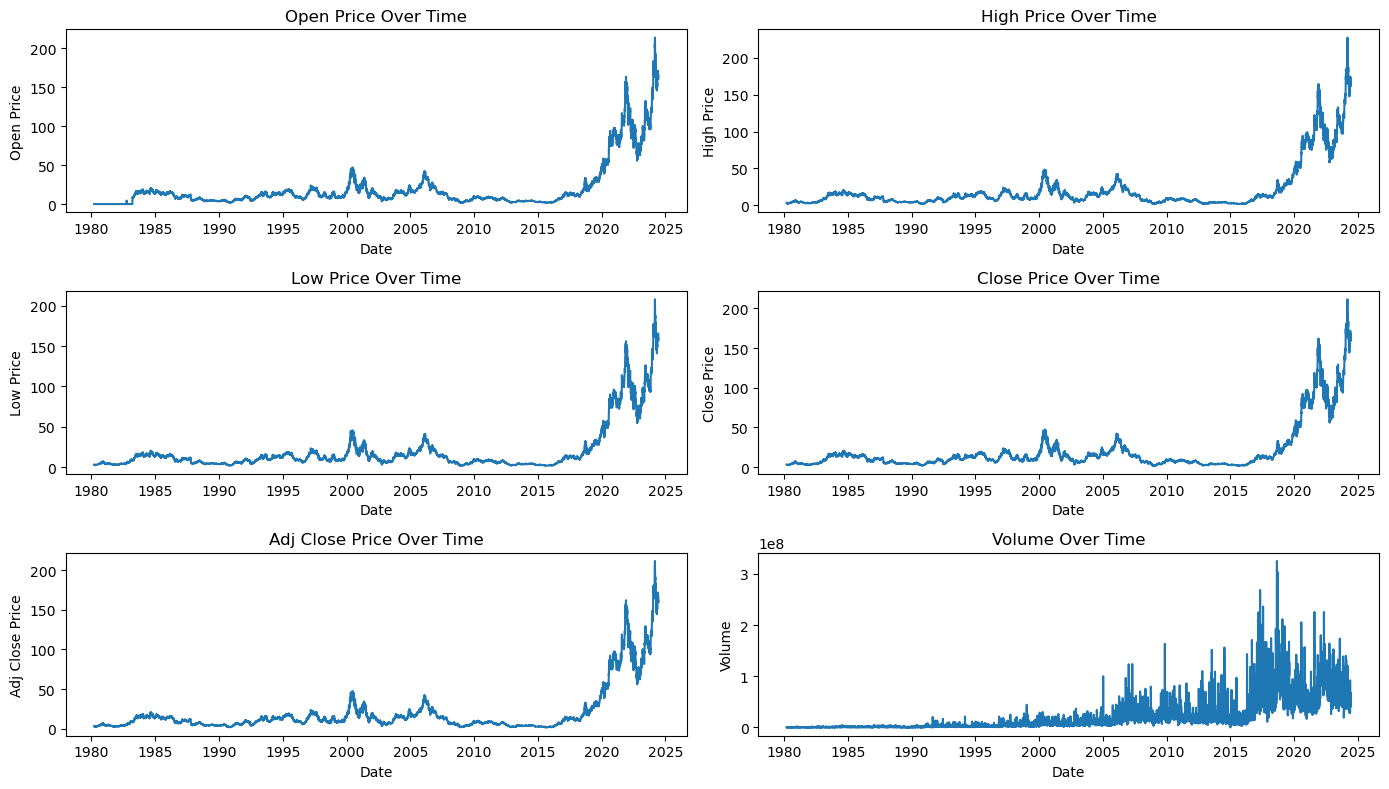

In [5]:
import matplotlib.pyplot as plt

# Plot trends for each variable
plt.figure(figsize=(14, 8))

plt.subplot(3, 2, 1)
plt.plot(data['Date'], data['Open'], label='Open')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Open Price Over Time')

plt.subplot(3, 2, 2)
plt.plot(data['Date'], data['High'], label='High')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('High Price Over Time')

plt.subplot(3, 2, 3)
plt.plot(data['Date'], data['Low'], label='Low')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.title('Low Price Over Time')

plt.subplot(3, 2, 4)
plt.plot(data['Date'], data['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')

plt.subplot(3, 2, 5)
plt.plot(data['Date'], data['Adj Close'], label='Adj Close')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.title('Adj Close Price Over Time')

plt.subplot(3, 2, 6)
plt.plot(data['Date'], data['Volume'], label='Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Over Time')

plt.tight_layout()
plt.show()

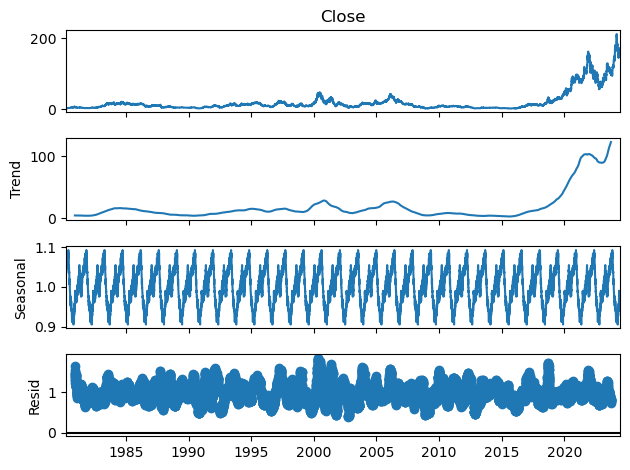

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set Date as index
data.set_index('Date', inplace=True)

# Decompose the time series
result = seasonal_decompose(data['Close'], model='multiplicative', period=365)

# Plot the decomposed components
result.plot()
plt.show()

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Define the model
model = ARIMA(data['Close'], order=(5, 1, 0))

# Fit the model
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()

model_summary

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                11154
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -17469.654
Date:                Thu, 13 Jun 2024   AIC                          34951.308
Time:                        14:18:32   BIC                          34995.225
Sample:                             0   HQIC                         34966.093
                              - 11154                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0278      0.003     -8.546      0.000      -0.034      -0.021
ar.L2         -0.0258      0.003     -8.870      0.000      -0.031      -0.020
ar.L3          0.0025      0.003      0.849      0.396      -0.003       0.008
ar.L4          0.0047      0.003      1.513      0.130      -0.001       0.011
ar.L5          0.0085      0.003      2.913      0.004       0.003       0.014
sigma2         1.3429      0.004    314.365      0.000       1.335       1.351
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            643186.21
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              37.93   Skew:                             0.53
Prob(H) (two-sided):                  0.00   Kurtosis:                        40.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


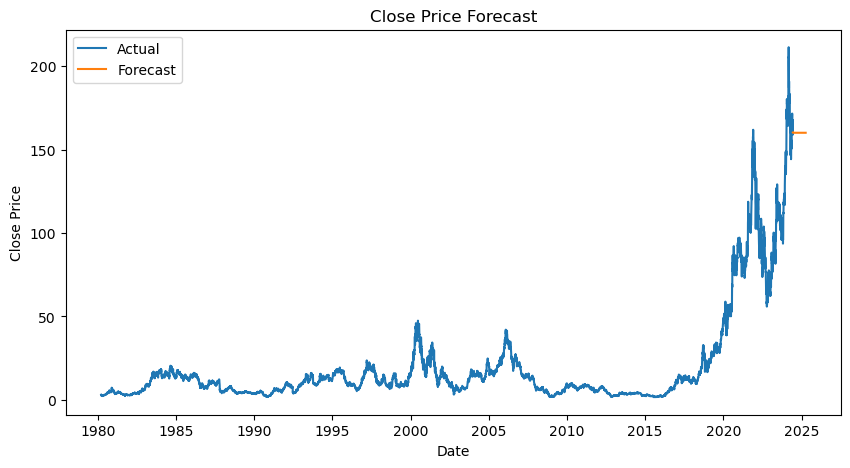

In [8]:
# Forecast future values
forecast_steps = 300  # Number of days to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Create a DataFrame to hold the forecasted values
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, inclusive='right')
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecast': forecast})

# Plot the actual and forecasted values
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], label='Actual')
plt.plot(forecast_df['Date'], forecast_df['Forecast'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Forecast')
plt.legend()
plt.show()